# Inspect model performance on test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from spatialnet import trajectory
from spatialnet.fileio import load_run, load_params, load_checkpoint
from spatialnet.parameters import print_params

In [2]:
# Directory where model is loaded from
RUN_DIRNAME = '20220524_01'
RUN_DIRPATH = f'models/{RUN_DIRNAME}'

# Number of trajectories to sample
N_TRIALS = 500

## Load model

In [3]:
run_params, model = load_run(RUN_DIRPATH)
print_params(run_params)

model:
  n_units: 100
  output_bias: false
  rnn_bias: true
num_batches: 1000
num_epochs: 8
test_batch_size: 500
trainer:
  batch_size: 500
  lambda_h: 10.0
  lambda_w: 10.0
  learning_rate: 0.0001
trajectory:
  boundary_height: 2.0
  boundary_shape: square
  coordinates: cartesian
  mean_speed: 0.2
  n_steps: 450
  rng_seed: 999
  std_norm: 0.5
  time_step: 0.1



## Simulate trajectories

In [4]:
# Use trajectory generator with different random seed for test data
new_seed = run_params['trajectory']['rng_seed'] + 1
traj_params = dict(run_params['trajectory'], rng_seed=new_seed)

# Sample batch
tgen = trajectory.TrajectoryGenerator(**traj_params)
vel, pos = tgen.smp_batch(N_TRIALS)

## Run model on all trials

In [5]:
pos_est, u_vals = model.run_np(vel)

## Plot results

In [6]:
b_shape = run_params['trajectory']['boundary_shape']
b_height = run_params['trajectory']['boundary_height']
boundary = trajectory.get_boundary(b_shape, b_height)

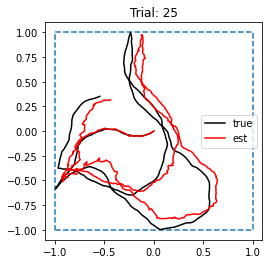

In [7]:
trial_plt = 25
t_start = 0
t_stop = 450

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
trajectory.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)

plt.savefig(f'{RUN_DIRNAME}_performance_{trial_plt}.png')

## Model weights

In [8]:
model.output.weight

Parameter containing:
tensor([[-2.1527e-01, -2.1345e-01,  4.1507e-01, -2.8862e-01,  3.1747e-01,
          2.5339e-01, -2.8925e-01,  3.0845e-01,  2.8778e-02, -2.9413e-01,
          2.5539e-01, -1.5196e-01,  2.7921e-01, -3.7044e-01,  4.1582e-01,
         -2.7897e-01, -2.9782e-01, -3.5783e-01, -1.7603e-01, -3.6305e-01,
         -3.0762e-01,  3.7170e-01, -2.6376e-01, -2.3663e-01, -3.5891e-01,
         -2.4808e-01,  2.5615e-01, -3.6110e-01,  3.7710e-01, -2.7961e-01,
         -2.4162e-01, -2.1332e-01,  2.9006e-01, -1.6043e-01,  3.6854e-01,
         -3.3437e-01, -2.5483e-01, -3.4143e-01, -2.0343e-01, -3.2499e-01,
          2.9459e-01,  2.4923e-01,  4.1090e-01, -3.0529e-01,  3.5763e-01,
         -4.9487e-01, -1.7528e-01, -2.1269e-01,  1.3963e-01,  3.0559e-01,
          2.7053e-01,  3.5678e-01, -2.5031e-01, -2.7129e-01, -2.3814e-01,
         -3.2871e-01, -3.4577e-01,  3.4048e-01,  6.9388e-02, -1.0215e-01,
          2.6234e-01,  2.8246e-01, -3.9890e-01,  5.8997e-02,  2.6736e-01,
          3.8075